# Section 4 - Machine Learning : EU Construction Industry

## Section 4.1 Importing Libraries and data

In [1]:
#Loading in the libraries required.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from requests_html import HTMLSession
import asyncio
import nest_asyncio
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
from collections import Counter
import nltk
from nltk.corpus import stopwords

In [2]:
#importing data
web_data = pd.read_csv('webscraped_data.csv',encoding="utf-8")

## Section 4.2 Sentiment Analysis

In [3]:
#viewing data table
web_data

,Title,Content
0,Homes Home Truths: Why a third of all new home...,What if a full one third of all the new homes ...
1,Irish Business Tom McEnaney: Builders of the w...,The critical issue impacting the number of hou...
2,Comment Eoin O’Malley: Ireland needs more buil...,The Government was excoriated in the Dáil last...
3,Business Public Private Partnership’s bad rap ...,Ray Wilson knows public private partnership (P...
4,Irish News Housing Minister Darragh O’Brien on...,"If self-confidence built homes, Darragh O’Brie..."
5,Personal Finance One solution to the housing c...,Declan Dunne rarely focuses on blame or on the...
6,Irish Business More than half of developers ha...,Over half of housing developers have postponed...
7,Personal Finance Richard Curran: I warned of a...,They say the past is a different country. And ...
8,World Business Spectre of 2008 crisis hovers o...,The collapse of Silicon Valley Bank (SVB) and ...
9,"Irish News An extra 50,000 homes could be deli...","An extra 50,000 homes can be delivered in the ..."


https://medium.com/@wisjnujudho/how-to-scrape-google-news-top-stories-bs4-nopagination-80b882a214e5
    https://www.geeksforgeeks.org/web-scraping-financial-news-using-python/

### Section 4.2.1 Data Prep

https://medium.com/@kiddojazz/reddit-sentiment-analysis-f8a1a790124a

In [4]:
#checking for duplicates
web_data.duplicated().sum()

0

In [5]:
# #removing unwanted characters and replacing with a blank like @, #, hyperlinks and :
# def cleantext(text):
#     text = re.sub(r'@[A-Za-z0–9]+', '', text)
#     text = re.sub(r'’','', str(text))
#     text = re.sub(r'#', '', text)
#     text = re.sub(r'https?:\/\/\S+', '', text) 
#     text = re.sub(r':', '', text) 
#     return text
# #using the function to clean the text
# web_data['Title']= web_data['Title'].apply(cleantext)
# #viewing the results
# web_data

### Section 4.2.2 Subjectivity and Polarity

In [6]:
#defining functions for subjectivity and polarity
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def polarity(text):
    return TextBlob(text).sentiment.polarity

In [7]:
#generating the polarity and subjectivity results and adding as columns to dataframe
web_data['Subjectivity']=web_data['Title'].apply(subjectivity)
web_data['Polarity']=web_data['Title'].apply(polarity)
web_data.head()

,Title,Content,Subjectivity,Polarity
0,Homes Home Truths: Why a third of all new home...,What if a full one third of all the new homes ...,0.173737,0.056566
1,Irish Business Tom McEnaney: Builders of the w...,The critical issue impacting the number of hou...,0.000000,0.000000
2,Comment Eoin O’Malley: Ireland needs more buil...,The Government was excoriated in the Dáil last...,0.500000,0.500000
3,Business Public Private Partnership’s bad rap ...,Ray Wilson knows public private partnership (P...,0.352083,-0.250000
4,Irish News Housing Minister Darragh O’Brien on...,"If self-confidence built homes, Darragh O’Brie...",0.333333,0.333333


In [8]:
#define polarity with text labels
def Insight(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [9]:
#adding a column insight for grouping the sentiments
web_data['Insight'] = web_data['Polarity'].apply(Insight)
web_data.head(50)

,Title,Content,Subjectivity,Polarity,Insight
0,Homes Home Truths: Why a third of all new home...,What if a full one third of all the new homes ...,0.173737,0.056566,Positive
1,Irish Business Tom McEnaney: Builders of the w...,The critical issue impacting the number of hou...,0.000000,0.000000,Neutral
2,Comment Eoin O’Malley: Ireland needs more buil...,The Government was excoriated in the Dáil last...,0.500000,0.500000,Positive
3,Business Public Private Partnership’s bad rap ...,Ray Wilson knows public private partnership (P...,0.352083,-0.250000,Negative
4,Irish News Housing Minister Darragh O’Brien on...,"If self-confidence built homes, Darragh O’Brie...",0.333333,0.333333,Positive
5,Personal Finance One solution to the housing c...,Declan Dunne rarely focuses on blame or on the...,0.183333,0.016667,Positive
6,Irish Business More than half of developers ha...,Over half of housing developers have postponed...,0.222222,0.111111,Positive
7,Personal Finance Richard Curran: I warned of a...,They say the past is a different country. And ...,0.300000,0.000000,Neutral
8,World Business Spectre of 2008 crisis hovers o...,The collapse of Silicon Valley Bank (SVB) and ...,0.000000,0.000000,Neutral
9,"Irish News An extra 50,000 homes could be deli...","An extra 50,000 homes can be delivered in the ...",0.050000,0.000000,Neutral


<function matplotlib.pyplot.show(close=None, block=None)>

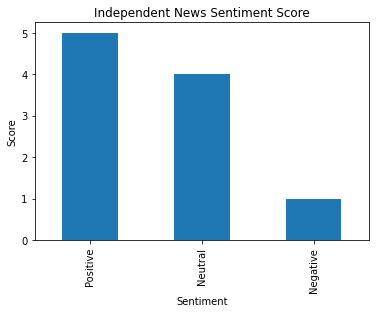

In [10]:
#visualise the insights
plt.title('Independent News Sentiment Score')
plt.xlabel('Sentiment')
plt.ylabel('Score')
plt.rcParams['figure.figsize']=(10,8)
web_data['Insight'].value_counts().plot(kind='bar')
plt.show

### Section 4.2.3 Wordcloud

In [20]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [12]:
#cleaning the data
stopwords = set(STOPWORDS)
word_cloud_data=web_data[['Title', 'Content']]
wordcloud_data=word_cloud_data.apply(lambda x: [w for w in x if w not in stopwords])

In [13]:
wordcloud_data.head()

,Title,Content
0,Homes Home Truths: Why a third of all new home...,What if a full one third of all the new homes ...
1,Irish Business Tom McEnaney: Builders of the w...,The critical issue impacting the number of hou...
2,Comment Eoin O’Malley: Ireland needs more buil...,The Government was excoriated in the Dáil last...
3,Business Public Private Partnership’s bad rap ...,Ray Wilson knows public private partnership (P...
4,Irish News Housing Minister Darragh O’Brien on...,"If self-confidence built homes, Darragh O’Brie..."


In [14]:
wordcloud_data['Text']=wordcloud_data['Title']+ ' '+wordcloud_data['Content']

In [15]:
wordcloud_list=' '.join(wordcloud_data['Text']).lower().split()

In [16]:
counts=Counter(wordcloud_list)

In [17]:
top_ten=dict(counts.most_common(10))

In [18]:
top_ten

{'the': 31,
 'of': 20,
 'a': 14,
 'in': 14,
 'and': 13,
 'to': 12,
 'at': 11,
 '03:30': 9,
 'be': 7,
 'housing': 7}

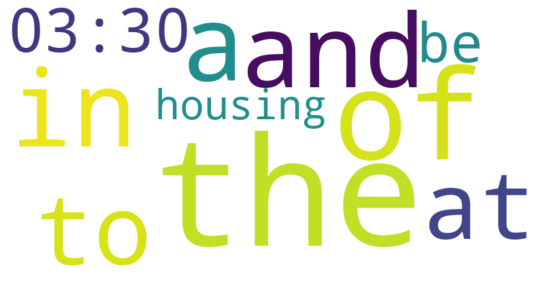

In [19]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_ten)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()